# FINTECH BOOTCAMP 

PROJECT 1: BABY STEP - BACKTESTING
---
###.[project info]

## Team member:
__


## Project description





In [1]:
# Initial import all libraries
import panel as pn
pn.extension('plotly')
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf


## I. DATA READING AND CLEANING

In [2]:
#Define the instruments to download data of S&P .
tickers = ['SPY']

# We would like all available data from 01/01/1999 until 12/31/2021.
start_date = datetime.date(1992,1,1)
end_date = datetime.date(2021,12,31)
years = round((end_date - start_date).days/365,0)
years

30.0

In [3]:
# User pandas_reader.data.DataReader to load the desired data. 
panel_data = data.DataReader("SPY", 'yahoo', start_date, end_date)

# Checkout the data type
type(panel_data)

pandas.core.frame.DataFrame

In [4]:
# Check data
panel_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.96875,43.75000,43.96875,43.93750,1003200.0,25.627346
1993-02-01,44.25000,43.96875,43.96875,44.25000,480500.0,25.809622
1993-02-02,44.37500,44.12500,44.21875,44.34375,201300.0,25.864302
1993-02-03,44.84375,44.37500,44.40625,44.81250,529400.0,26.137688
1993-02-04,45.09375,44.46875,44.96875,45.00000,531500.0,26.247066


In [5]:
# Filter closing price only
price = panel_data.drop(columns = ["High", "Low", "Open", "Volume", "Adj Close"])
price.head()

,Close
Date,
1993-01-29,43.93750
1993-02-01,44.25000
1993-02-02,44.34375
1993-02-03,44.81250
1993-02-04,45.00000


In [6]:
# Describe data
price.describe()

,Close
count,7285.000000
mean,153.427416
std,87.173320
min,43.406250
25%,101.625000
50%,128.669998
75%,195.580002
max,477.480011


In [7]:
# Count nulls and drop nulls (in any)
price.isnull().sum()

Close    0
dtype: int64

In [8]:
# Check  if closing price is float 
price.dtypes

Close    float64
dtype: object

## II. CALCULATE SPY RETURN, CAGR, AND SHARPE RATIO  

In [9]:
inital_investment = 10000 

In [10]:
# Find out min and max value
min_spy = price["Close"].min()

In [11]:
max_spy = price["Close"].max()

In [12]:
def chart_spy ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(price["Close"])
    ax.set(xlabel = "Year",
    ylabel = "Price")
    #plt.yticks(np.linspace(min_spy.min(), max_spy.max(),10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return chart_spy
#     return pn.pane.Matplotlib(tight= True)[in case of nto shown in dashboard]

<function __main__.chart_spy()>

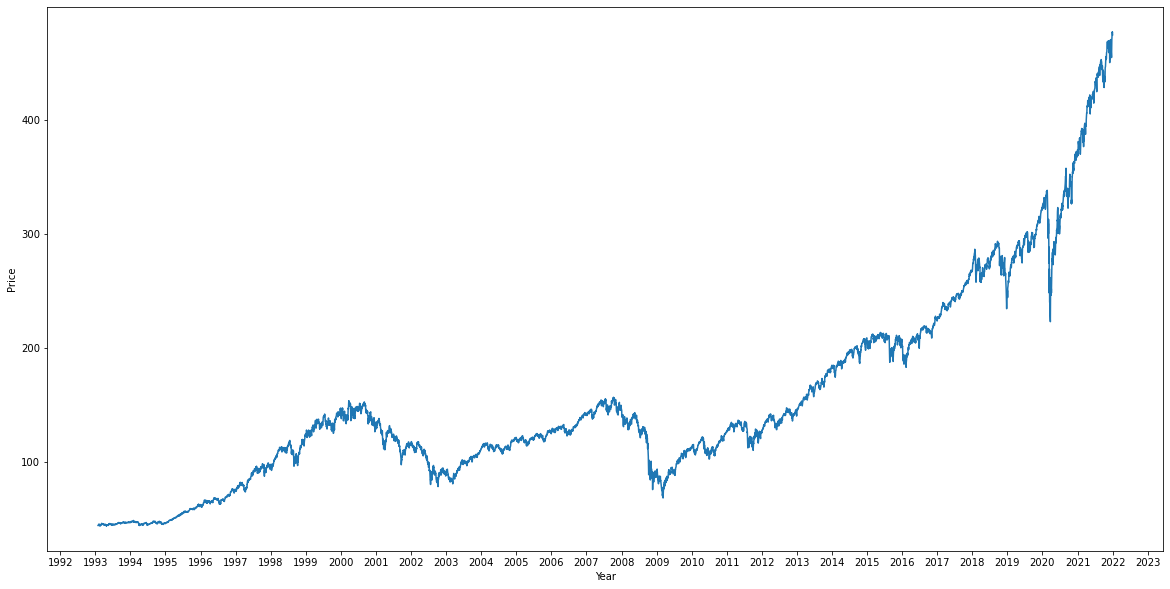

In [13]:
chart_spy()

In [14]:
# Calculate returns for SPY as a benchmark and compound annual growth rate (CAGR)
spy_daily_return = price [["Close"]]
spy_daily_return = spy_daily_return.pct_change()
spy_daily_return.rename(columns= {"Close" : "BM Daily Return"}, inplace = True)

In [15]:
# Cumulative return
spy_daily_return["BM Cumulative Return"] = (1 + spy_daily_return["BM Daily Return"]).cumprod()
spy_daily_return.dropna(inplace = True)
spy_daily_return

,BM Daily Return,BM Cumulative Return
Date,,
1993-02-01,0.007112,1.007112
1993-02-02,0.002119,1.009246
1993-02-03,0.010571,1.019915
1993-02-04,0.004184,1.024182
1993-02-05,-0.000694,1.023471
...,...,...
2021-12-27,0.014152,10.862248
2021-12-28,-0.000817,10.853371
2021-12-29,0.001279,10.867255


In [16]:
# Total return and CAGR
total_return_pct = round((spy_daily_return["BM Cumulative Return"][-1]/spy_daily_return["BM Cumulative Return"][0] - 1) * 100, 2)
cagr_pct = round((((spy_daily_return["BM Cumulative Return"][-1]/spy_daily_return["BM Cumulative Return"][0])**(1/years))-1)*100,2)

In [17]:
print(total_return_pct)
print(cagr_pct)

973.36
8.23


In [18]:
# Calculate standard deviation and sharpe ratio for SPY as a benchmark
annualized_std_spy = round(spy_daily_return["BM Daily Return"].std()*np.sqrt(252),2)
annualized_std_spy

0.19

In [19]:
sharpe_ratio_spy = round(spy_daily_return["BM Daily Return"].mean()/annualized_std_spy)
sharpe_ratio_spy

0

In [20]:
# Calculate benchmark drawdown

In [21]:
spy_daily_return["Peak Cummulative"] = spy_daily_return["BM Cumulative Return"].cummax()
spy_daily_return["Daily Drawdown"] = spy_daily_return["BM Cumulative Return"] - spy_daily_return["Peak Cummulative"]

In [22]:
bm_drawdown_pct = round(((spy_daily_return["Daily Drawdown"]/spy_daily_return["Peak Cummulative"]).min())*100,2)
bm_drawdown_pct

-56.47

In [23]:
# Summary for benchmark SPY
df_summary = pd.DataFrame()
index =  ["Benchmark", "Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4", "Strategy 5"]
columns =  ["Total Return", "CAGR", "Annualized Standard Deviation", "Sharpe Ratio", "Drawdown"]
df_summary = pd.DataFrame(columns = columns, index=index)
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,NaN,NaN,NaN,NaN,NaN
Strategy 1,NaN,NaN,NaN,NaN,NaN
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


In [24]:
df_summary.loc["Benchmark"] = pd.Series({ "Total Return" : total_return_pct, "CAGR" : cagr_pct, "Annualized Standard Deviation" : annualized_std_spy, "Sharpe Ratio" : sharpe_ratio_spy, "Drawdown" :bm_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,973.36,8.23,0.19,0.0,-56.47
Strategy 1,NaN,NaN,NaN,NaN,NaN
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


## III. SIMPLE MOVING AVERAGE CROSSOVER BACKTESTING

### 1. Strategy 1 - Backtesting 50 SMA crossing 200 SMA [Hanna here]

In [25]:
# Define variables
fast_ma_1 = 50
slow_ma_1 = 200

In [26]:
# Calculate moving average for Strategy 1

In [27]:
strategy1 = price[["Close"]]

In [28]:
strategy1["Fast SMA"] = strategy1["Close"].rolling(window = fast_ma_1).mean()
strategy1["Slow SMA"] = strategy1["Close"].rolling(window = slow_ma_1).mean()
strategy1

,Close,Fast SMA,Slow SMA
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,435.577850
2021-12-28,476.869995,463.063001,435.980150
2021-12-29,477.480011,463.668801,436.388000


<function __main__.strategy1_plot()>

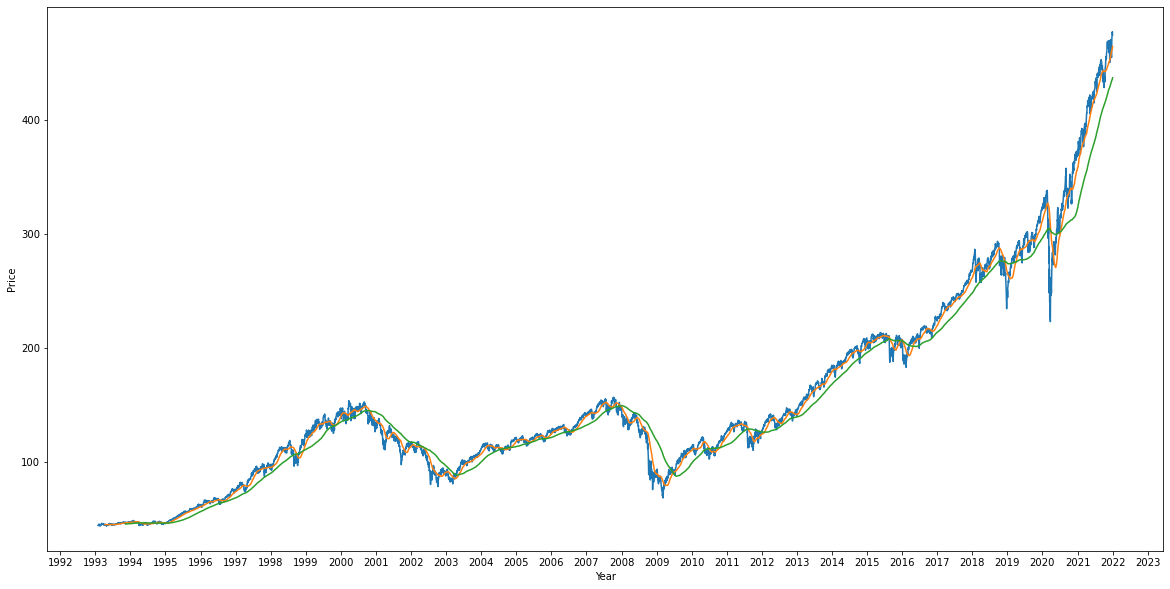

In [29]:
# Plot a graph
def strategy1_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy1)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy1_plot
strategy1_plot()

In [30]:
# Define entries for long position
strategy1

,Close,Fast SMA,Slow SMA
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,435.577850
2021-12-28,476.869995,463.063001,435.980150
2021-12-29,477.480011,463.668801,436.388000


In [31]:
# Calculate the strategy balance

In [32]:
benchmark_spy = spy_daily_return[["BM Daily Return"]]
benchmark_spy

,BM Daily Return
Date,
1993-02-01,0.007112
1993-02-02,0.002119
1993-02-03,0.010571
1993-02-04,0.004184
1993-02-05,-0.000694
...,...
2021-12-27,0.014152
2021-12-28,-0.000817
2021-12-29,0.001279


In [33]:
strategy1_return = pd.concat([strategy1,benchmark_spy],axis=1, join = "inner")
strategy1_return["Long Position"] = strategy1['Fast SMA'] > strategy1["Slow SMA"]
strategy1_return.head()

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position
Date,,,,,
1993-02-01,44.25000,NaN,NaN,0.007112,False
1993-02-02,44.34375,NaN,NaN,0.002119,False
1993-02-03,44.81250,NaN,NaN,0.010571,False
1993-02-04,45.00000,NaN,NaN,0.004184,False
1993-02-05,44.96875,NaN,NaN,-0.000694,False


In [34]:
strategy1_return["Strategy1 Return"] = np.where(strategy1_return["Long Position"].shift(1) == True, strategy1_return["BM Daily Return"], 0)
strategy1_return.head()

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return
Date,,,,,,
1993-02-01,44.25000,NaN,NaN,0.007112,False,0.0
1993-02-02,44.34375,NaN,NaN,0.002119,False,0.0
1993-02-03,44.81250,NaN,NaN,0.010571,False,0.0
1993-02-04,45.00000,NaN,NaN,0.004184,False,0.0
1993-02-05,44.96875,NaN,NaN,-0.000694,False,0.0


In [35]:
strategy1_return["Strategy1 Cumulative Return"] = (1+ strategy1_return["Strategy1 Return"]).cumprod()
strategy1_return

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return,Strategy1 Cumulative Return
Date,,,,,,,
1993-02-01,44.250000,NaN,NaN,0.007112,False,0.000000,1.000000
1993-02-02,44.343750,NaN,NaN,0.002119,False,0.000000,1.000000
1993-02-03,44.812500,NaN,NaN,0.010571,False,0.000000,1.000000
1993-02-04,45.000000,NaN,NaN,0.004184,False,0.000000,1.000000
1993-02-05,44.968750,NaN,NaN,-0.000694,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,10.093105
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,10.084857
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,10.097757


In [36]:
# Plot with the benchmark
def strategy1_return_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(spy_daily_return["BM Cumulative Return"])
    ax.plot(strategy1_return["Strategy1 Cumulative Return"])
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy1_return_plot

<function __main__.strategy1_return_plot()>

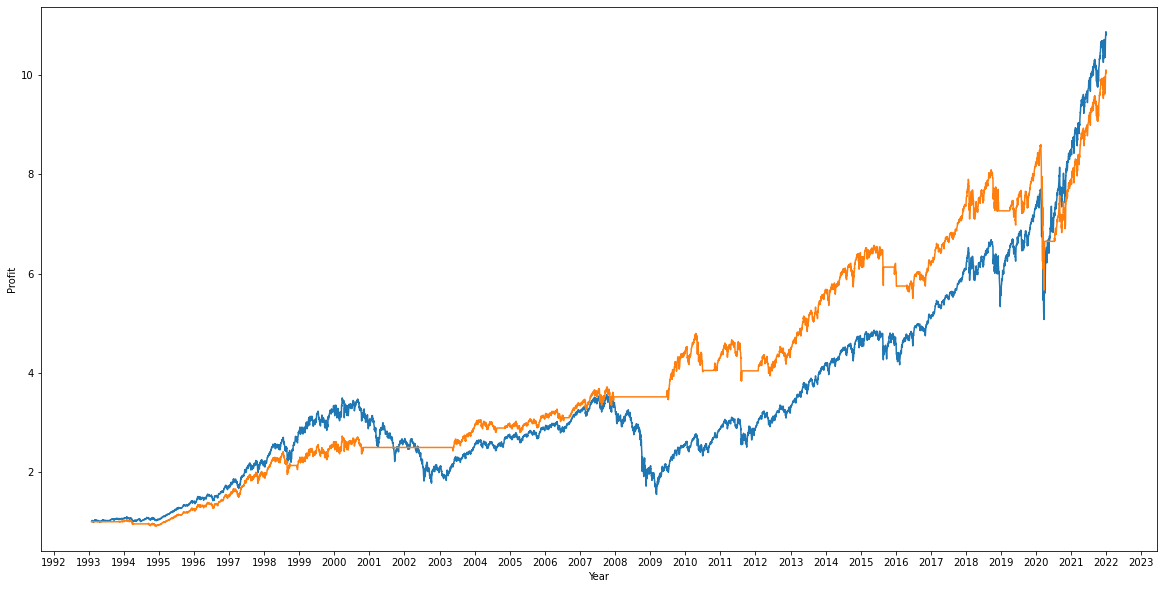

In [37]:
strategy1_return_plot()

In [38]:
# Calculate strategy total return and CAGR

strategy1_total_return_pct = round((strategy1_return["Strategy1 Cumulative Return"][-1]/strategy1_return["Strategy1 Cumulative Return"][0] - 1) * 100, 2)
strategy1_cagr_pct = round((((strategy1_return["Strategy1 Cumulative Return"][-1]/strategy1_return["Strategy1 Cumulative Return"][0])**(1/years))-1)*100,2)

In [39]:
print(strategy1_total_return_pct)

904.45


In [40]:
print(strategy1_cagr_pct)

7.99


In [41]:
# Calculate standard deviation and sharpe ratio
strategy1_annualized_std = round(strategy1_return["Strategy1 Return"].std()*np.sqrt(252),2)
strategy1_annualized_std

0.13

In [42]:
strategy1_sharpe_ratio = round((strategy1_return["Strategy1 Return"].mean() * 252)/strategy1_annualized_std,2)
strategy1_sharpe_ratio

0.68

In [43]:
# Calculate Drawdown strategy 1
strategy1_return["Strategy1 Peak Cummulative"] =strategy1_return["Strategy1 Cumulative Return"].cummax()
strategy1_return["Strategy1 Daily Drawdown"] = strategy1_return["Strategy1 Cumulative Return"] - strategy1_return["Strategy1 Peak Cummulative"]

In [44]:
strategy1_drawdown_pct = round(((strategy1_return["Strategy1 Daily Drawdown"]/ strategy1_return["Strategy1 Peak Cummulative"]).min())*100,2)
strategy1_drawdown_pct

-34.1

In [45]:
# Summary of the strategy1 

In [46]:
df_summary.loc["Strategy 1"] = pd.Series({ "Total Return" : strategy1_total_return_pct, "CAGR" : strategy1_cagr_pct, "Annualized Standard Deviation" : strategy1_annualized_std, "Sharpe Ratio" : strategy1_sharpe_ratio, "Drawdown" :strategy1_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,973.36,8.23,0.19,0.0,-56.47
Strategy 1,904.45,7.99,0.13,0.68,-34.1
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


### 2. Backtesting 50 SMA crossing 100 SMA [Claudia here]

In [47]:
# Define variables
fast_ma_2 = 50
slow_ma_2 = 100

In [48]:
# Calculate moving average

In [49]:
# Plot a graph

In [50]:
# Define entries for long position

In [51]:
# Define exit for short position

In [52]:
# Calculate the strategy balance

In [53]:
# Plot with the benchmark

In [54]:
# Calculate strategy total return and CAGR

In [55]:
# Calculate standard deviation and sharpe ratio

In [56]:
# Calculate benchmark drawdown

In [57]:
# Summary of the strategy

### 3. Backtesting 20 EMA crossing 50 SMA [Atousa here]

In [58]:
# Define variables
fast_ma_3 = 20
slow_ma_3 = 50

In [59]:
# Calculate moving average

In [60]:
# Plot a graph

In [61]:
# Define entries for long position

In [62]:
# Define exit for short position

In [63]:
# Calculate the strategy balance

In [64]:
# Plot with the benchmark

In [65]:
# Calculate strategy total return and CAGR

In [66]:
# Calculate standard deviation and sharpe ratio

In [67]:
# Calculate benchmark drawdown

In [68]:
# Summary of the strategy

### 4. Backtesting 11 EMA crossing the 49 EMA [Jalal here]

In [69]:
# Define variables
fast_ma_4 = 11
slow_ma_4 = 49

In [70]:
# Calculate moving average

In [71]:
# Plot a graph

In [72]:
# Define entries for long position

In [73]:
# Define exit for short position

In [74]:
# Calculate the strategy balance

In [75]:
# Plot with the benchmark

In [76]:
# Calculate strategy total return and CAGR

In [77]:
# Calculate standard deviation and sharpe ratio

In [78]:
# Calculate benchmark drawdown

In [79]:
# Summary of the strategy

### 5. Strategy 5: Backtesting 9 EMA crossing the 20 EMA 

In [80]:
# Define variables
fast_ma_5 = 9
slow_ma_5 = 20

In [81]:
# Calculate moving average for Strategy 5

In [82]:
strategy5 = price[["Close"]]
strategy5

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2021-12-27,477.260010
2021-12-28,476.869995
2021-12-29,477.480011


In [83]:
strategy5["Fast EMA"] = strategy5["Close"].ewm(span=fast_ma_5, adjust=False,min_periods=fast_ma_5).mean()
strategy5["Slow EMA"] = strategy5["Close"].ewm(span=slow_ma_5, adjust=False,min_periods=slow_ma_5).mean()
strategy5

,Close,Fast EMA,Slow EMA
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2021-12-27,477.260010,467.613408,465.494746
2021-12-28,476.869995,469.464726,466.578103
2021-12-29,477.480011,471.067783,467.616380


<function __main__.strategy5_plot()>

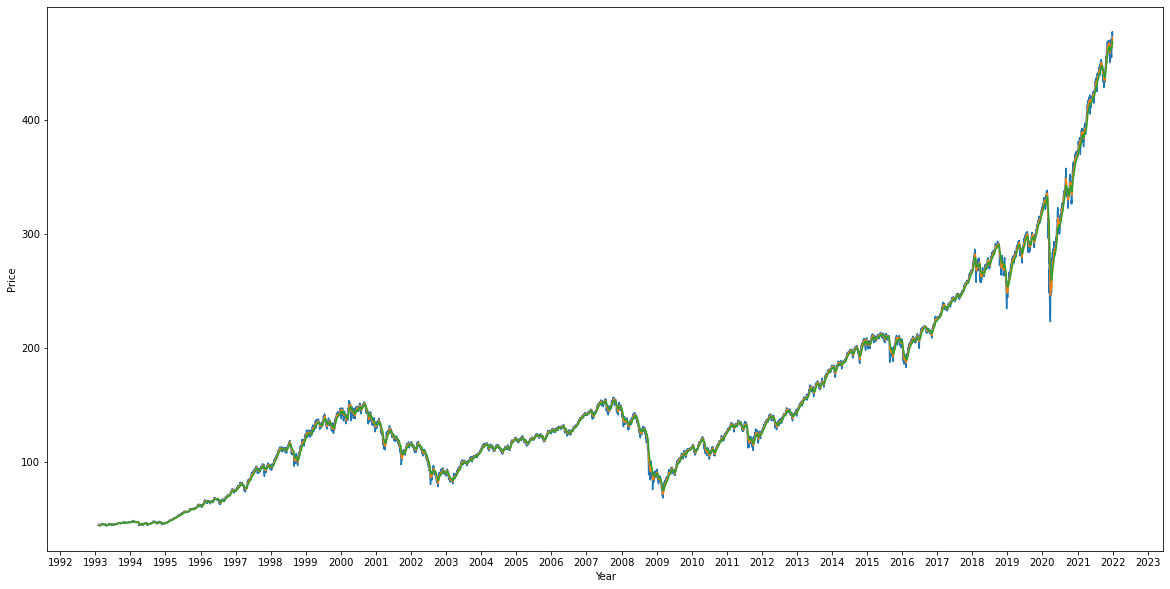

In [84]:
# Plot a graph
def strategy5_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy5)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy5_plot
strategy5_plot()

In [85]:
# Define entries for long position

In [86]:
strategy5_return = pd.concat([strategy5,benchmark_spy],axis=1, join = "inner")
strategy5_return["Long Position"] = strategy5['Fast EMA'] > strategy5["Slow EMA"]
strategy5_return.head()

,Close,Fast EMA,Slow EMA,BM Daily Return,Long Position
Date,,,,,
1993-02-01,44.25000,NaN,NaN,0.007112,False
1993-02-02,44.34375,NaN,NaN,0.002119,False
1993-02-03,44.81250,NaN,NaN,0.010571,False
1993-02-04,45.00000,NaN,NaN,0.004184,False
1993-02-05,44.96875,NaN,NaN,-0.000694,False


In [87]:
strategy5_return["Strategy5 Return"] = np.where(strategy5_return["Long Position"].shift(1) == True, strategy5_return["BM Daily Return"], 0)
strategy5_return.tail()

,Close,Fast EMA,Slow EMA,BM Daily Return,Long Position,Strategy5 Return
Date,,,,,,
2021-12-27,477.260010,467.613408,465.494746,0.014152,True,0.014152
2021-12-28,476.869995,469.464726,466.578103,-0.000817,True,-0.000817
2021-12-29,477.480011,471.067783,467.616380,0.001279,True,0.001279
2021-12-30,476.160004,472.086227,468.430058,-0.002765,True,-0.002765
2021-12-31,474.959991,472.660980,469.051957,-0.002520,True,-0.002520


In [88]:
strategy5_return["Strategy5 Cumulative Return"] = (1+ strategy5_return["Strategy5 Return"]).cumprod()
strategy5_return

,Close,Fast EMA,Slow EMA,BM Daily Return,Long Position,Strategy5 Return,Strategy5 Cumulative Return
Date,,,,,,,
1993-02-01,44.250000,NaN,NaN,0.007112,False,0.000000,1.000000
1993-02-02,44.343750,NaN,NaN,0.002119,False,0.000000,1.000000
1993-02-03,44.812500,NaN,NaN,0.010571,False,0.000000,1.000000
1993-02-04,45.000000,NaN,NaN,0.004184,False,0.000000,1.000000
1993-02-05,44.968750,NaN,NaN,-0.000694,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,467.613408,465.494746,0.014152,True,0.014152,2.778698
2021-12-28,476.869995,469.464726,466.578103,-0.000817,True,-0.000817,2.776427
2021-12-29,477.480011,471.067783,467.616380,0.001279,True,0.001279,2.779979


In [89]:
# Plot with the benchmark
def strategy5_return_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(spy_daily_return["BM Cumulative Return"])
    ax.plot(strategy5_return["Strategy5 Cumulative Return"])
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy5_return_plot

<function __main__.strategy5_return_plot()>

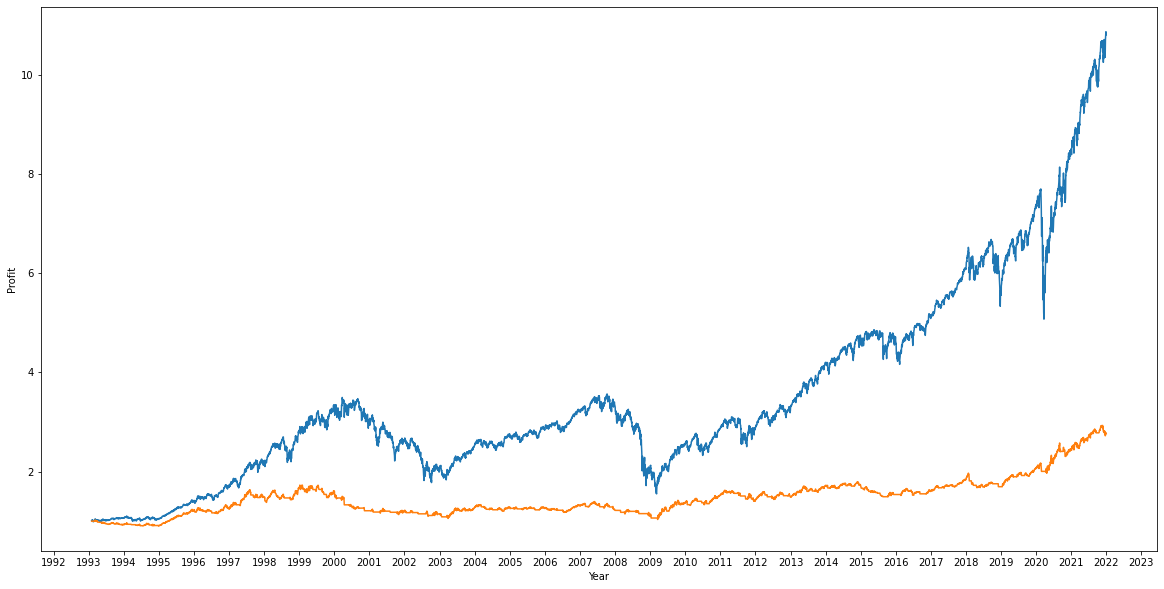

In [90]:
strategy5_return_plot()

In [91]:
# Calculate strategy total return and CAGR

strategy5_total_return_pct = round((strategy5_return["Strategy5 Cumulative Return"][-1]/strategy5_return["Strategy5 Cumulative Return"][0] - 1) * 100, 2)
strategy5_cagr_pct = round((((strategy5_return["Strategy5 Cumulative Return"][-1]/strategy5_return["Strategy5 Cumulative Return"][0])**(1/years))-1)*100,2)

In [92]:
print(strategy5_total_return_pct)
print(strategy5_cagr_pct)

176.53
3.45


In [93]:
# Calculate standard deviation and sharpe ratio
strategy5_annualized_std = round(strategy5_return["Strategy5 Return"].std()*np.sqrt(252),2)
strategy5_annualized_std

0.11

In [94]:
strategy5_sharpe_ratio = round(strategy5_return["Strategy5 Return"].mean() * 252/strategy5_annualized_std,2)
strategy5_sharpe_ratio

0.37

In [95]:
# Calculate Drawdown strategy 1
strategy5_return["Strategy5 Peak Cummulative"] =strategy5_return["Strategy5 Cumulative Return"].cummax()
strategy5_return["Strategy5 Daily Drawdown"] = strategy5_return["Strategy5 Cumulative Return"] - strategy5_return["Strategy5 Peak Cummulative"]

In [96]:
strategy5_drawdown_pct = round(((strategy5_return["Strategy5 Daily Drawdown"]/ strategy5_return["Strategy5 Peak Cummulative"]).min())*100,2)
strategy5_drawdown_pct

-40.17

In [97]:
# Summary of the strategy1 

In [98]:
df_summary.loc["Strategy 5"] = pd.Series({ "Total Return" : strategy5_total_return_pct, "CAGR" : strategy5_cagr_pct, "Annualized Standard Deviation" : strategy5_annualized_std, "Sharpe Ratio" : strategy5_sharpe_ratio, "Drawdown" :strategy5_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,973.36,8.23,0.19,0.0,-56.47
Strategy 1,904.45,7.99,0.13,0.68,-34.1
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,176.53,3.45,0.11,0.37,-40.17


## IV. COMPARISON AMONG DIFFERENT STRATEGIES [DASHBOARD]

## V. CONCLUSION AND RECOMMENDATIONS